## Automated Analysis

In [1]:
#Import json
import json

#Import ijson to read large json files iteratively
import ijson

#Import Time module
import time

#Import numpy and pandas
import numpy as np
import pandas as pd

#Import matplotlib for plotting graphs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

#Import seaborn to to enhance visualisation
import seaborn as sns

#Import Apache Spark
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql import functions

from pyspark import SparkContext

#Import relevant data types from pyspark schema definition
from pyspark.sql.types import StructType, StructField, StringType, TimestampType

#Import path from OS to handle file paths in windows
from os import path

There were no values to plot
There was an issue with the values being passed for plotting in iotp_kfb22t_envirosensor_2018-w24for sensor 8014
There were no values to plot
There was an issue with the values being passed for plotting in iotp_kfb22t_envirosensor_2018-w25for sensor 8008
There were no values to plot
There was an issue with the values being passed for plotting in iotp_kfb22t_envirosensor_2018-w25for sensor 8014
There were no values to plot
There was an issue with the values being passed for plotting in iotp_kfb22t_envirosensor_2018-w26for sensor 8008
There were no values to plot
There was an issue with the values being passed for plotting in iotp_kfb22t_envirosensor_2018-w26for sensor 8014
There were no values to plot
There was an issue with the values being passed for plotting in iotp_kfb22t_envirosensor_2018-w27for sensor 8008
There were no values to plot
There was an issue with the values being passed for plotting in iotp_kfb22t_envirosensor_2018-w27for sensor 8014
There 

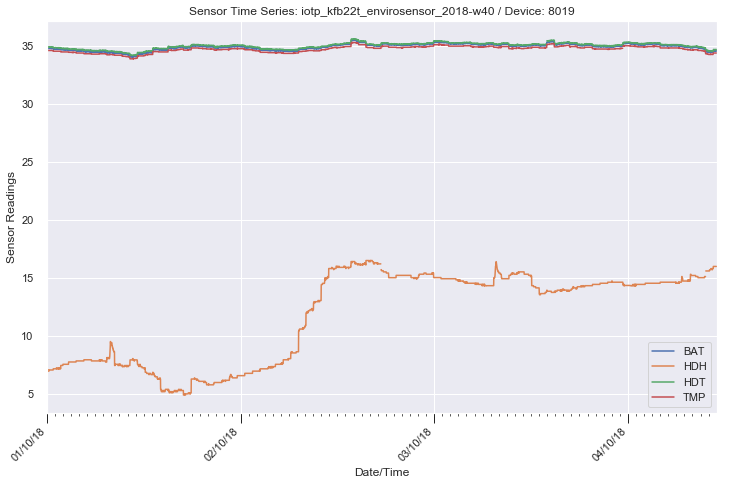

In [2]:
#Time execution of the code
start = time.time()

#List of files
files = [
    'iotp_kfb22t_envirosensor_2018-w19',
    'iotp_kfb22t_envirosensor_2018-w20',
    'iotp_kfb22t_envirosensor_2018-w21',
    'iotp_kfb22t_envirosensor_2018-w22',
    'iotp_kfb22t_envirosensor_2018-w23',
    'iotp_kfb22t_envirosensor_2018-w24',
    'iotp_kfb22t_envirosensor_2018-w25',
    'iotp_kfb22t_envirosensor_2018-w26',
    'iotp_kfb22t_envirosensor_2018-w27',
    'iotp_kfb22t_envirosensor_2018-w28',
    'iotp_kfb22t_envirosensor_2018-w29',
    'iotp_kfb22t_envirosensor_2018-w30',
    'iotp_kfb22t_envirosensor_2018-w31',
    'iotp_kfb22t_envirosensor_2018-w32',
    'iotp_kfb22t_envirosensor_2018-w33',
    'iotp_kfb22t_envirosensor_2018-w34',
    'iotp_kfb22t_envirosensor_2018-w35',
    'iotp_kfb22t_envirosensor_2018-w36',
    'iotp_kfb22t_envirosensor_2018-w37',
    'iotp_kfb22t_envirosensor_2018-w38',
    'iotp_kfb22t_envirosensor_2018-w39',
    'iotp_kfb22t_envirosensor_2018-w40'
]

#List of devices: Devices 8009 and 8020 were faulty and have been removed from the list
devices = [
    '8001',
    '8002',
    '8003',
    '8004',
    '8005',
    '8006',
    '8007',
    '8008',
    '8010',
    '8011',
    '8012',
    '8013',
    '8014',
    '8015',
    '8016',
    '8017',
    '8018',
    '8019',
]

#Function to plot horizontal bar chart with matplotlib
def sensorBarChart():
    
    #Use %matplotlib for output plots to appear inline in the Jupyter notebook
    %matplotlib inline

    # Set the default figure size for all inline plots (must be used after %matplotlib)
    plt.rcParams['figure.figsize'] = [12, 8]

    #Set aesthetic parameters with Seaborn
    sns.set()
    
    # Plot horizontal bar chart
    visual_df.plot(kind='barh',x='DeviceID', y='count', alpha = 0.5, color='darkblue', legend = False)

    plt.xticks(rotation=60)
    plt.ylabel("DeviceID")
    plt.xlabel("Number of Sensor Observations")
    plt.title("Number of Sensor Observations by Sensor: "  + currentFile)
    plt.gca().yaxis.grid(linestyle=':')

    plt.savefig(r'plots/' + (currentFile) + '.png')
        
#Function to plot time series 
def sensorTimeSeries():
    #Use %matplotlib for output plots to appear inline in the Jupyter notebook
    %matplotlib inline

    # Set the default figure size for all inline plots (must be used after %matplotlib)
    plt.rcParams['figure.figsize'] = [12, 8]

    #Set aesthetic parameters with Seaborn
    sns.set()
    
    #Locate and format dates for X axis 
    days = mdates.DayLocator()
    hours = mdates.HourLocator()
    days_fmt = mdates.DateFormatter('%d/%m/%y')

    #Store current axis to layer plots
    ax = plt.gca()

    #Format the ticks
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.xaxis.set_minor_locator(hours)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=10)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)

    #Need method to highlight weekends instead of using hardcoded range
    #ax.axvspan(736910, 736912, facecolor='gray', edgecolor='none', alpha=.5)
    
    try:
        #visual_df.plot(kind='line',x='Time', y='BAR', ax=ax)
        visual_df.plot(kind='line',x='Time', y='BAT', ax=ax)
        visual_df.plot(kind='line',x='Time', y='HDH', ax=ax)
        visual_df.plot(kind='line',x='Time', y='HDT', ax=ax)
        #visual_df.plot(kind='line',x='Time', y='OPT', ax=ax)
        visual_df.plot(kind='line',x='Time', y='TMP', ax=ax)
    except:
        print('There were no values to plot')

    plt.xticks(rotation=45)
    plt.ylabel("Sensor Readings")
    plt.xlabel("Date/Time")
    plt.title("Sensor Time Series: " + currentFile + " / " + 'Device: ' + currentDevice)

    #Save figure
    plt.savefig(r'plots/' + (currentFile) + '_' + (currentDevice) + '.png')



#Create a Spark session
spark = SparkSession \
    .builder \
    .appName("Envirosensor Data Analysis") \
    .getOrCreate()

SparkContext.setSystemProperty('spark.executor.memory', '4g')


#loop through files
for i in files:
    
    #Pick file by index
    currentFile = i
    filename = path.expanduser(r'data/' + (currentFile) + '.json')
    
    #Define function to iteratively parse json file
    def iterativeParse(json):
        with open(json, 'r') as json_file:
            #Use the items method in ijson to extract a list of objects specifying the file and key path to to the list
            objects = ijson.items(json_file, 'item.data')
            #The items fuction returns a generator which we turn into a list of payloads with the list function 
            parsedData = list(objects)

        return parsedData

    payloads = iterativeParse(filename)

    #Establish sensor payload schema
    sc = spark.sparkContext
    testRDD = sc.parallelize(payloads[0:1],8)
    test_df = spark.read.json(testRDD)

    #Build and return a schema to use for the sample data
    def build_schema():
    
        schema = test_df.schema
    
        return schema

    #Load payloads into RDDs
    sc = spark.sparkContext
    payloadsRDD = sc.parallelize(payloads,8)

    #Convert RDD to dataframe using data schema
    processedData = spark.read.json(payloadsRDD, schema=build_schema())
    
    #Flatten and reorder spark dataframe
    flat_df = processedData.select(
        "DeviceType",
        "DeviceID",
        "Event",
        "Time",
        "Data.BAR",
        "Data.BAT",
        "Data.HDH",
        "Data.HDT",
        "Data.OPT",
        "Data.TMP"
    )
    
    #Convert datatypes and reorder
    flat_df = flat_df.select(
        flat_df.DeviceType,
        flat_df.DeviceID,
        flat_df.Event,
        flat_df.Time.cast("timestamp"),
        flat_df.BAR.cast("float"),
        flat_df.BAT.cast("float"),
        flat_df.HDH.cast("float"),
        flat_df.HDT.cast("float"),
        flat_df.OPT.cast("float"),
        flat_df.TMP.cast("float"),
    )
    
    #Spark analysis by week
    
    #Create temporary view of sensor reading
    flat_df.createOrReplaceTempView("sensorReadings")
    
    #Create dataframe of that view
    df_sql = spark.sql("SELECT * FROM sensorReadings")
    
    #Count weekly sensor observations by device
    df_sql = spark.sql("SELECT DeviceID, COUNT(*) AS count FROM sensorReadings GROUP BY DeviceID ORDER BY DeviceID")
    
    #Convert to Pandas dataframe for visualisation
    visual_df = df_sql.toPandas()
    
    #Plot weekly sensor observations
    sensorBarChart()
    
    #Provide summary plot by device
    for i in devices:
        currentDevice = i
        
        #Filter by device
        sensor_df = flat_df.filter(flat_df["DeviceID"]==currentDevice)
        
        #Create temorary view
        sensor_df.createOrReplaceTempView("sensorReadingsByDevice")
        
        #Create time ordered dataframe from that view
        df_sql = spark.sql("SELECT * FROM sensorReadingsByDevice ORDER BY Time")
        
        #Convert to pandas dataframe for visualisation
        visual_df = df_sql.toPandas()
        
        #Plot time series by sensor
        try:
            sensorTimeSeries()
        except:
            print('There was an issue with the values being passed for plotting in ' + currentFile + 'for sensor ' + currentDevice)

end = time.time()

#Display time taken to complete process
print(f'\nTime to complete: {end - start:.2f}s\n')
            